In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [4]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


# Data Preprocessing

In [5]:
data.shape

(7920, 3)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [8]:
import re
import string

##### 1.Convert Upper to Lower

In [9]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

##### 2.Remove Links

In [11]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [12]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '' ,x, flags=re.MULTILINE) for x in x.split()))

In [13]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

##### 3.Remove Punctuations

In [14]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

In [15]:
data['tweet'] = data['tweet'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [16]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

##### 4.remove numbers

In [17]:
data['tweet'] = data['tweet'].str.replace('\d+','',regex=True)

In [18]:
data['tweet'].tail()

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

##### 5.Remove stopwords

In [19]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import nltk

In [21]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [22]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [23]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [24]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

##### 6.Stemming

In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [26]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [27]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [28]:
data.to_csv('../artifacts/preprocessed.csv')

## Vocabulary Building

In [29]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [114]:
from collections import Counter
vocab = Counter()

In [115]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [116]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [135]:
tokens = [key for key in vocab if vocab[key] > 40]

In [118]:
tokens

['android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'smartphon',
 'wifi',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'stupid',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'new',
 'charger',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'iphonex',
 'shop',
 'music',
 'photo',
 'fun',
 'selfi',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'everi',
 'need',
 'realli',
 'design',
 'give',
 'anoth',
 'lol',
 'work',
 'play',
 'ipad',
 'batteri',
 'charg',
 'summer',
 'like',
 'share',
 'want',
 'instagram',
 'photooftheday',
 'tweegram',
 'one',
 'suck',
 'store',
 'screen',
 'art',
 'friend',
 'face',
 'ive',
 'day',
 'back',
 'black',
 'keep',
 'get',
 'text',
 'cant',
 'check',
 'galaxi',
 'sam

In [119]:
len(tokens)

288

In [136]:
def save_vocab(lines,filename):
    data = '\n'.join(lines)
    file = open(filename , 'w', encoding='utf-8')
    file.write(data)
    file.close()

save_vocab(tokens, '../static/model/vocabulary.txt')

## Dataset Split

In [121]:
X = data['tweet']
y = data['label']

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train , y_test = train_test_split(X,y,test_size=0.2)

(1584,)

## Vectorization

In [137]:
def vectorizer(df, vocabulary):
    vectorized_lst = []

    for sentence in df:
        sentence_lst = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
        vectorized_lst.append(sentence_lst)
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)

    return vectorized_lst_new
    

In [138]:
vect_x_train = vectorizer(X_train, tokens)

In [139]:
vect_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [140]:
vect_x_test = vectorizer(X_test, tokens)

In [142]:
vect_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<Axes: xlabel='label'>

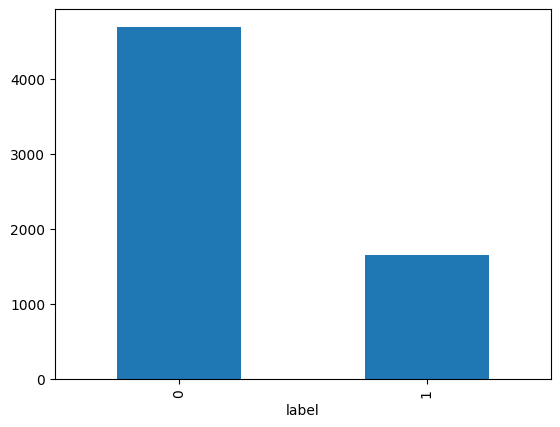

In [143]:
y_train.value_counts().plot(kind='bar')

In [ ]:
!pip install imbalanced-learn

In [144]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vect_x_train_smt, y_train_smt = smote.fit_resample(vect_x_train,y_train)

# Model Training And Evaluation

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [100]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f"Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}")

### Logistic Regression

In [145]:
lr = LogisticRegression()
lr.fit(vect_x_train_smt, y_train_smt)

y_train_pred = lr.predict(vect_x_train_smt)

training_scores(y_train_smt, y_train_pred)

y_test_pred = lr.predict(vect_x_test)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.908
	Precision = 0.881
	Recall = 0.942
	F1-Score = 0.911
Testing Scores:
	Accuracy = 0.866
	Precision = 0.674
	Recall = 0.85
	F1-Score = 0.751


### Naive Bayes

In [146]:
mnb = MultinomialNB()
mnb.fit(vect_x_train_smt, y_train_smt)

y_train_pred = mnb.predict(vect_x_train_smt)

training_scores(y_train_smt, y_train_pred)

y_test_pred = mnb.predict(vect_x_test)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.886
	Precision = 0.852
	Recall = 0.933
	F1-Score = 0.891
Testing Scores:
	Accuracy = 0.848
	Precision = 0.632
	Recall = 0.873
	F1-Score = 0.733


### Desicion Tree

In [147]:
dt = DecisionTreeClassifier()
dt.fit(vect_x_train_smt, y_train_smt)

y_train_pred = dt.predict(vect_x_train_smt)

training_scores(y_train_smt, y_train_pred)

y_test_pred = dt.predict(vect_x_test)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.996
	Precision = 0.997
	Recall = 0.995
	F1-Score = 0.996
Testing Scores:
	Accuracy = 0.827
	Precision = 0.651
	Recall = 0.596
	F1-Score = 0.623


### SVC

In [148]:
svc = SVC()
svc.fit(vect_x_train_smt, y_train_smt)

y_train_pred = svc.predict(vect_x_train_smt)

training_scores(y_train_smt, y_train_pred)

y_test_pred = svc.predict(vect_x_test)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.957
	Precision = 0.934
	Recall = 0.983
	F1-Score = 0.958
Testing Scores:
	Accuracy = 0.881
	Precision = 0.717
	Recall = 0.828
	F1-Score = 0.769


## Save Model

In [151]:
import pickle

with open("../static/model/model.pickle", 'wb') as file:
    pickle.dump(svc, file)